In [24]:
import matplotlib.pyplot as plt
import pickle
from collections import OrderedDict
import operator

In [16]:
f = open('../Data/parties.csv', 'rb')
parties = []
contents = f.readlines()
f.close()
for rec in contents:
    parties.append(rec.strip().decode('utf-8'))

In [3]:
f = open('../Results/Pickles/member_details.pickle', 'rb')
member_details = pickle.load(f)
f.close()

In [4]:
f = open('../Results/Pickles/debate_details.pickle', 'rb')
debate_details = pickle.load(f)
f.close()

# Interactions of individual parties

In [5]:
time_interactions = {}
session_dates = set([])

for debate in debate_details:
    for rec in debate_details[debate]:
        session_dates.add(rec[1])
        
for rec in session_dates:
    time_interactions[rec] = {}
    for p in parties:
        time_interactions[rec][str(p)] = 0
                
for debate in debate_details:
    for rec in debate_details[debate]:
        for participant in rec[0]:
            participant = participant.split()
            if 'Shri' in participant:
                participant.remove('Shri')
            if 'Dr.' in participant:
                participant.remove('Dr.')
            if 'Smt.' in participant:
                participant.remove('Smt.')
            participant = ' '.join(participant)
            if participant != 'Kumar Meira':
                time_interactions[rec[1]][member_details[participant][0]] += 1

## Plotting interactions of parties

In [6]:
colors = ['#8b8378', '#cdb79e', '#ff4500', '#2f4f4f', '#191970', '#6495ed', '#7b68ee', '#00ffff', '#66cdaa', '#7fffd4', '#006400', '#556b2f', '#00ff7f', '#f0e68c', '#bdb76b', '#ffff00', '#daa520', '#b8860b', '#bc8f8f', '#f4a460', '#d2691e', '#b22222', '#4682b4', '#ff0000', '#ff1493', '#db7093', '#d02090', '#9932cc', '#d8bfd8', '#bebebe', '#0000ff', '#ff8c00', '#ffd700', '#e9967a', '#ffdead', '#ffffff','#ee8f8f', '#0b5670', '#fa8072']

color_map = {}

for i in range(len(parties)):
    color_map[parties[i]] = colors[i]

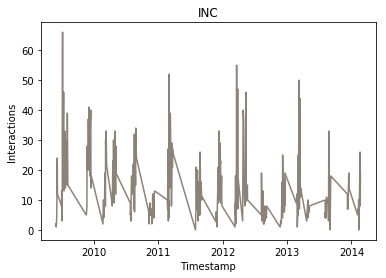

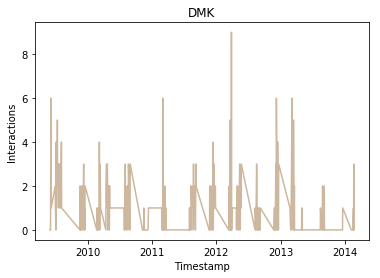

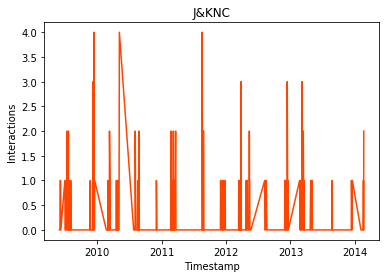

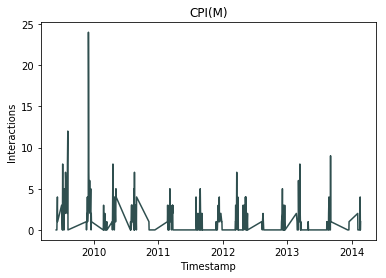

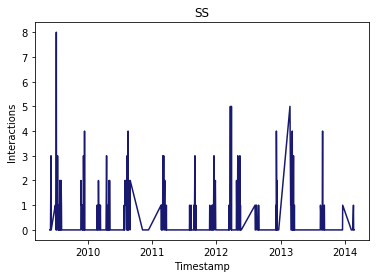

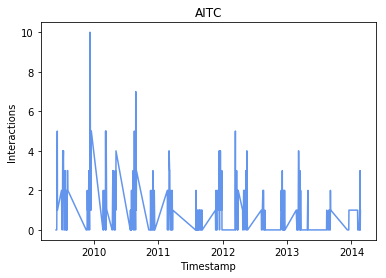

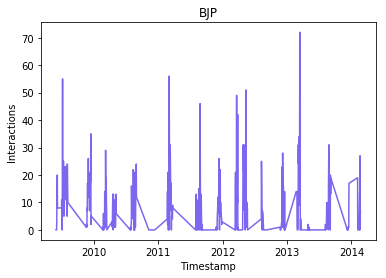

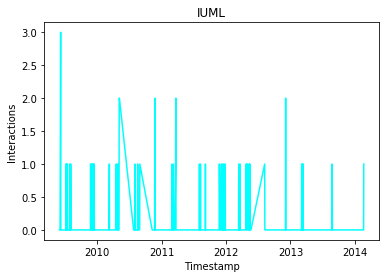

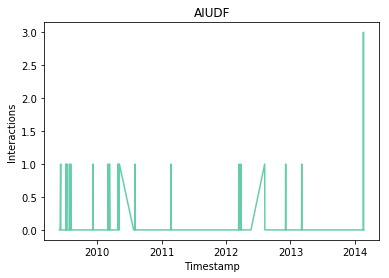

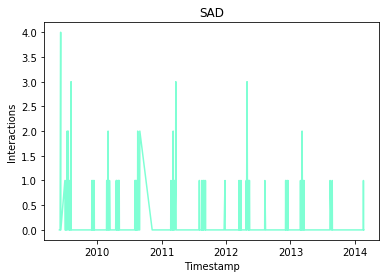

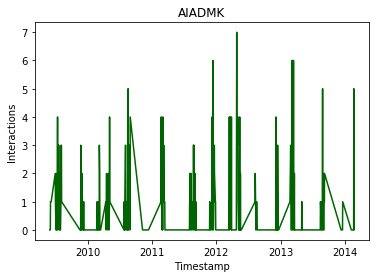

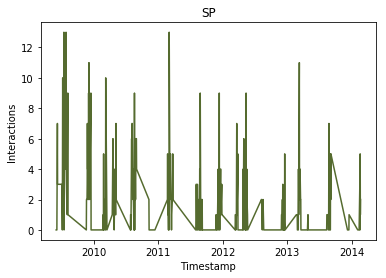

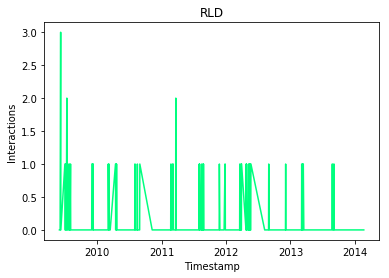

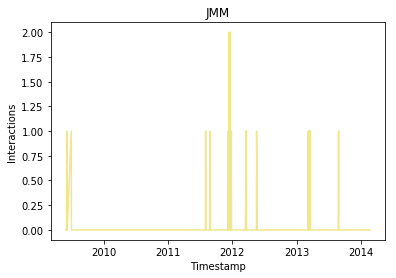

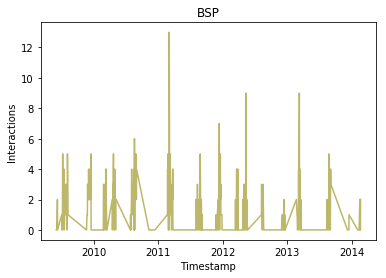

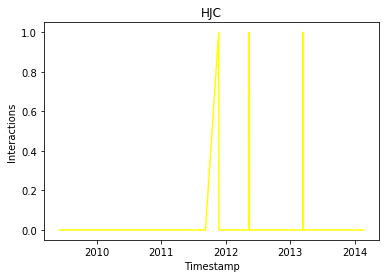

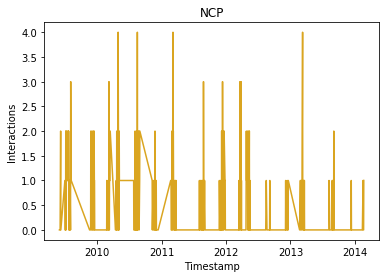

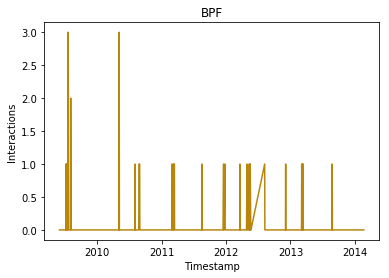

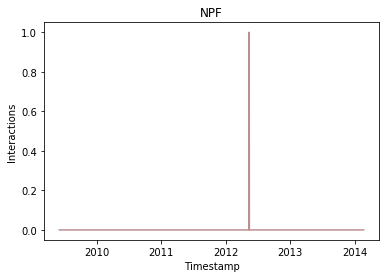

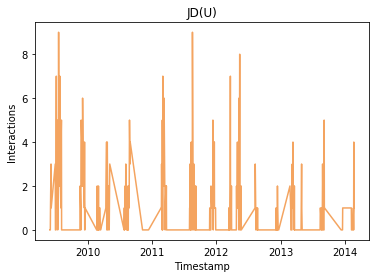

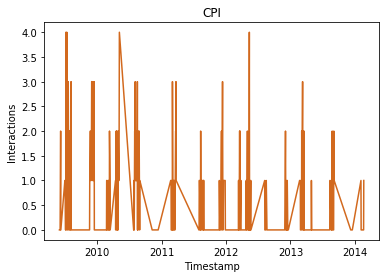

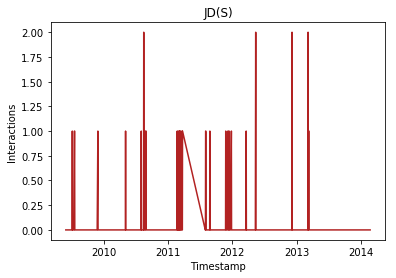

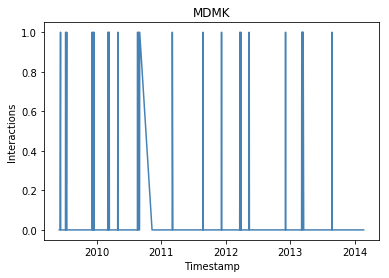

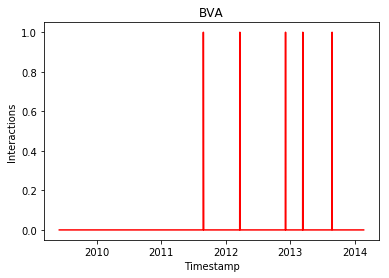

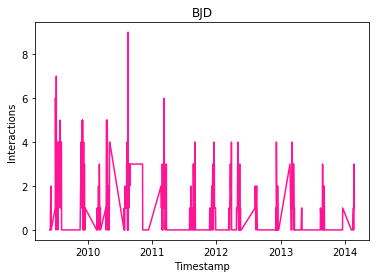

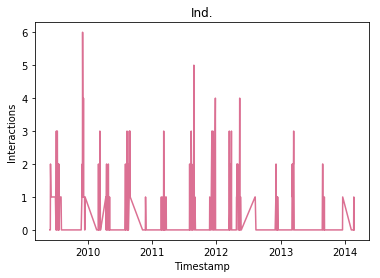

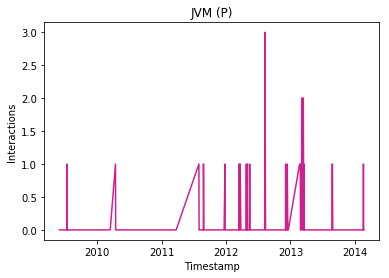

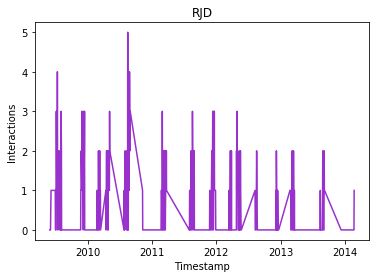

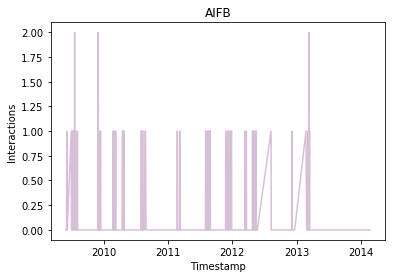

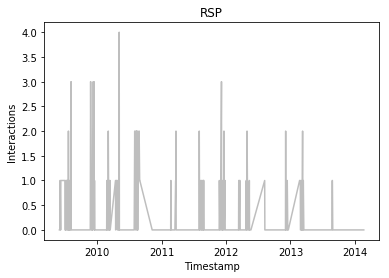

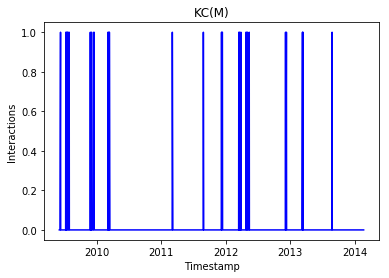

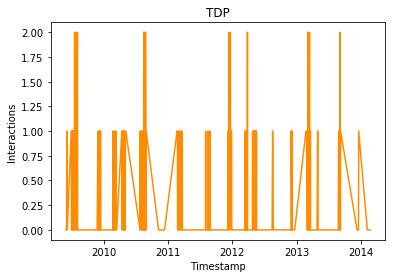

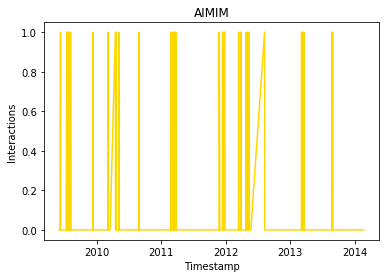

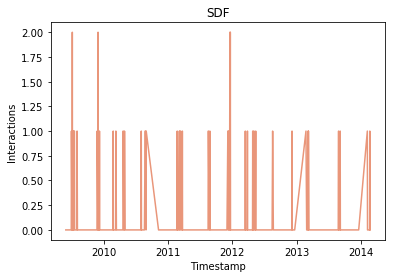

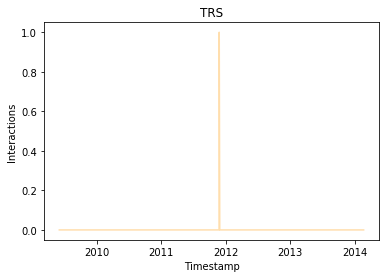

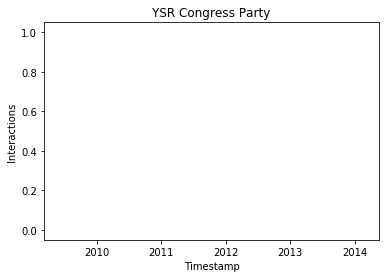

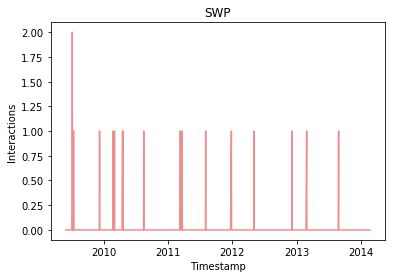

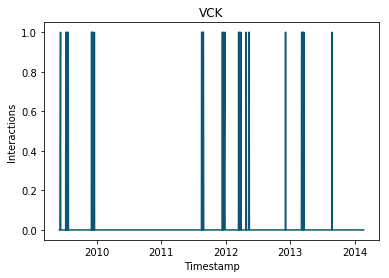

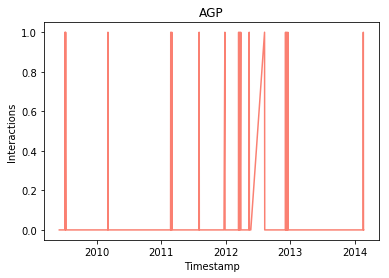

In [9]:
x = sorted(list(session_dates))

for p in parties:
    y = [time_interactions[rec][p] for rec in x]
    plt.plot(x, y, color_map[p])
    plt.title(p)
    plt.xlabel('Timestamp')
    plt.ylabel('Interactions')
    plt.savefig('../Results/Graphs/Interaction_' + p + '.png')
    plt.show()

## Interactions of alliances

In [10]:
alliances = ['UPA', 'NDA', 'TF', 'Others']

party_alliance = {'INC':'UPA', 'DMK':'Others', 'J&KNC':'UPA', 'CPI(M)':'TF', 'SS':'NDA', 'AITC':'UPA', 'BJP':'NDA',\
                  'IUML':'UPA', 'AIUDF':'Others', 'SAD':'NDA', 'AIADMK':'TF', 'SP':'Others', 'RLD':'UPA', 'JMM':'NDA',\
                  'BSP':'TF', 'HJC':'NDA', 'NCP':'UPA', 'BPF':'NDA', 'NPF':'UPA', 'JD(U)':'Others', 'CPI':'TF',\
                  'JD(S)':'TF', 'MDMK':'TF', 'BVA':'Others', 'BJD':'TF', 'Ind.':'Others', 'JVM (P)':'Others',\
                  'RJD':'Others', 'AIFB':'TF', 'RSP':'TF', 'KC(M)':'UPA', 'TDP':'TF', 'AIMIM':'Others', 'SDF':'NDA',\
                  'TRS':'NDA', 'YSR Congress Party':'Others', 'SWP':'Others', 'VCK':'Others', 'AGP':'NDA'}

#JMM - Jharkhand Mukti Morcha was with NDA till 2013 and with UPA in 2014.

In [17]:
x = sorted(list(session_dates))
alliance_interactions = {}

for rec in x:
    alliance_interactions[rec] = {}
    for a in alliances:
        alliance_interactions[rec][a] = 0

for rec in x:
    for p in parties:
        alliance_interactions[rec][party_alliance[p]] += time_interactions[rec][p]

## Plotting interactions of alliances

In [19]:
color_map = {'UPA':'red', 'NDA':'blue', 'TF':'green', 'Others':'black'}

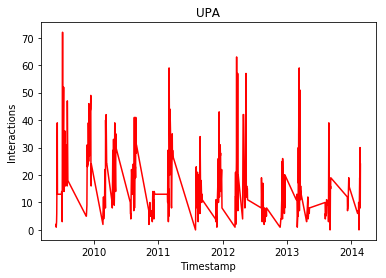

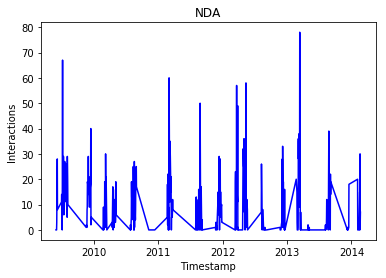

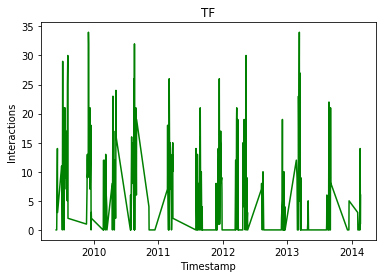

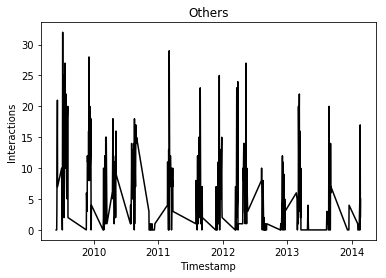

In [21]:
x = sorted(list(session_dates))

for a in alliances:
    y = [alliance_interactions[rec][a] for rec in x]
    plt.plot(x, y, color_map[a])
    plt.title(a)
    plt.xlabel('Timestamp')
    plt.ylabel('Interactions')
    plt.savefig('../Results/Graphs/Interaction_' + a + '.png')
    plt.show()

## Comparing total interactions to determine relevance of parties

In [26]:
total_interactions = {}

for p in parties:
    total = 0
    for rec in session_dates:
        total += time_interactions[rec][p]
    total_interactions[p] = total
    
print(sorted(total_interactions.items(), key = operator.itemgetter(1), reverse = True))

[('INC', 4907), ('BJP', 2695), ('SP', 701), ('CPI(M)', 532), ('JD(U)', 426), ('BSP', 418), ('BJD', 378), ('AITC', 361), ('DMK', 350), ('AIADMK', 305), ('RJD', 238), ('CPI', 230), ('SS', 202), ('Ind.', 187), ('NCP', 184), ('RSP', 124), ('TDP', 113), ('J&KNC', 109), ('SAD', 95), ('AIFB', 63), ('RLD', 62), ('IUML', 57), ('SDF', 53), ('BPF', 35), ('JD(S)', 34), ('AIMIM', 34), ('JVM (P)', 32), ('KC(M)', 31), ('VCK', 29), ('MDMK', 25), ('AIUDF', 21), ('SWP', 20), ('JMM', 19), ('AGP', 16), ('YSR Congress Party', 6), ('BVA', 5), ('HJC', 3), ('NPF', 1), ('TRS', 1)]
